# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Tsamarah Muthi'ah Abdullah]
- **Email:** [a135xaf486@devacademy.id]
- **ID Dicoding:** [a135xaf48]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?
- Pertanyaan 2 : Seberapa besar pengaruh cuaca ekstrem terhadap penurunan jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit # Menginstal Streamlit untuk membuat dashboard.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install pyngrok

## Data Wrangling

### Gathering Data

In [3]:
import pandas as pd

# Load dataset
df_day = pd.read_csv('/content/day.csv')
df_hour = pd.read_csv('/content/hour.csv')

# Tampilkan 5 baris pertama dari masing-masing dataset
print("Day Dataset:")
display(df_day.head())

print("\nHour Dataset:")
display(df_hour.head())

Day Dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Hour Dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Jumlah penyewa terdaftar (registered users) jauh lebih tinggi dibanding penyewa tidak terdaftar (casual users).
- Ada perbedaan jumlah peminjaman antara hari kerja(workingday) dan akhir pekan(weekday).

### Assessing Data

In [4]:
# Cek informasi dataset
print("Dataset Day:")
df_day.info()
print("\nDataset Hour:")
df_hour.info()

# Cek jumlah missing values
print("\nMissing values in Day dataset:")
print(df_day.isnull().sum())

print("\nMissing values in Hour dataset:")
print(df_hour.isnull().sum())

# Cek duplikasi
print("\nDuplicated rows in Day dataset:", df_day.duplicated().sum())
print("Duplicated rows in Hour dataset:", df_hour.duplicated().sum())

Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 

**Insight:**
- Tidak ada missing values
- Tidak ada duplikasi

### Cleaning Data

In [6]:
# Hapus data duplikat jika ada
df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

# Konversi tipe data dteday jika diperlukan
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Konfirmasi perubahan
print("\nUpdated Day Dataset:")
df_day.info()

print("\nUpdated Hour Dataset:")
df_hour.info()


Updated Day Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: d

**Insight:**
- Kolom dteday sudah dikonversi menjadi tipe datetime64[ns]
- Tidak ada missing values ataupun duplikasi dalam data

## Exploratory Data Analysis (EDA)

### Explore ...

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

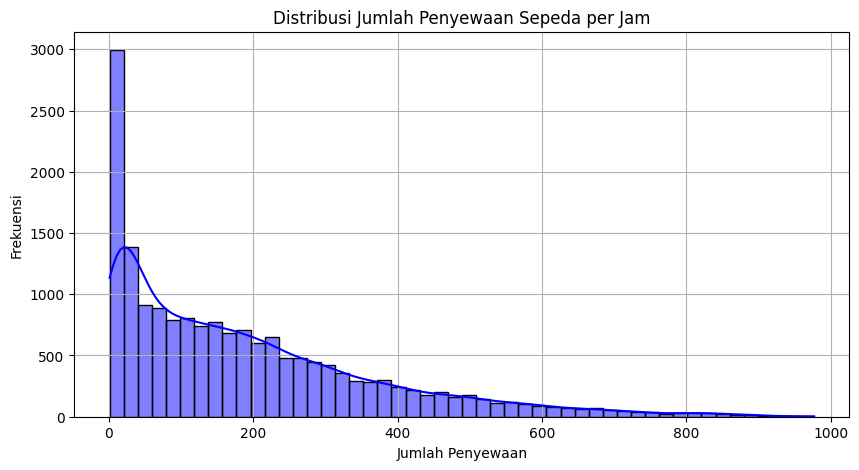

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Tampilkan 5 baris pertama dari masing-masing dataset
print(day_df.head())
print(hour_df.head())

# Cek informasi dataset
print(day_df.info())
print(hour_df.info())

# Cek apakah ada missing values
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

# Cek statistik ringkasan dataset
print(day_df.describe())
print(hour_df.describe())

# Histogram jumlah penyewaan sepeda
plt.figure(figsize=(10,5))
sns.histplot(hour_df['cnt'], bins=50, kde=True, color='b')
plt.title("Distribusi Jumlah Penyewaan Sepeda per Jam")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

**Insight:**
- Histogram right-skewed (melengkung ke kanan), yang berarti sebagian besar jam memiliki penyewaan rendah, dan hanya sedikit jam dengan penyewaan sangat tinggi.
- Puncak pertama menunjukkan jam-jam dengan penyewaan rendah sangat sering terjadi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?

[Hour_df] Jam dengan penyewaan tertinggi: 17:00 dengan rata-rata 461 sepeda.
[Hour_df] Jam dengan penyewaan terendah: 4:00 dengan rata-rata 6 sepeda.


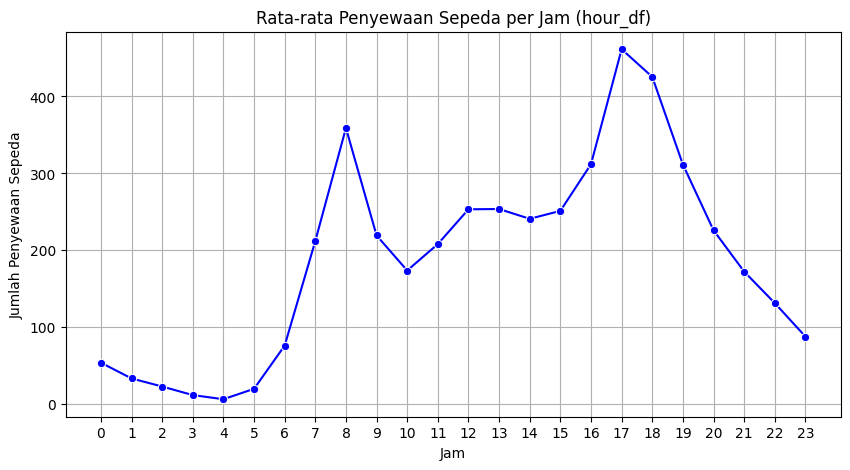

[Hour_df] Jam sibuk di hari kerja: 17:00 dengan rata-rata 525 sepeda.
[Hour_df] Jam sibuk di akhir pekan: 13:00 dengan rata-rata 373 sepeda.


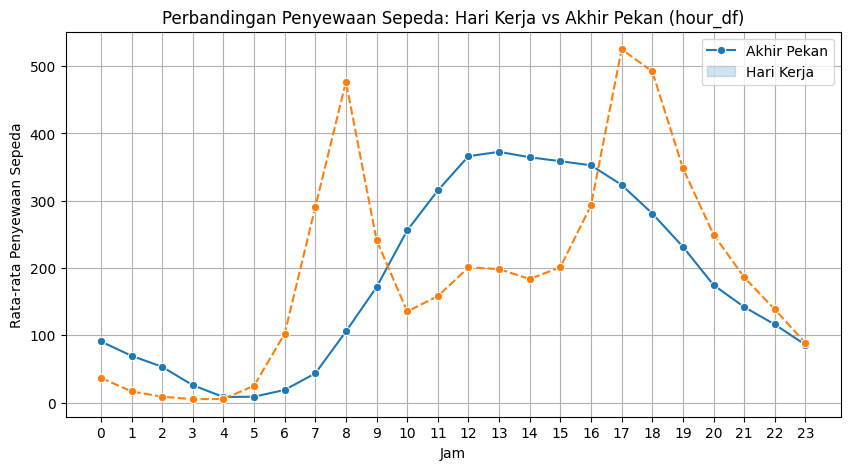

In [25]:
# Hitung rata-rata penyewaan sepeda per jam
hourly_avg = hour_df.groupby('hr')['cnt'].mean()

# Menentukan jam dengan penyewaan tertinggi dan terendah
max_hour = hourly_avg.idxmax()
max_rentals = round(hourly_avg.max())  # Dibulatkan ke bilangan bulat
min_hour = hourly_avg.idxmin()
min_rentals = round(hourly_avg.min())  # Dibulatkan ke bilangan bulat

print(f"[Hour_df] Jam dengan penyewaan tertinggi: {max_hour}:00 dengan rata-rata {max_rentals} sepeda.")
print(f"[Hour_df] Jam dengan penyewaan terendah: {min_hour}:00 dengan rata-rata {min_rentals} sepeda.")

# Visualisasi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', color='b')
plt.title("Rata-rata Penyewaan Sepeda per Jam (hour_df)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Hitung rata-rata penyewaan berdasarkan hari kerja dan akhir pekan
daily_hour_avg = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().unstack()

# Menentukan jam sibuk di hari kerja dan akhir pekan
workday_max = daily_hour_avg[1].idxmax()
weekend_max = daily_hour_avg[0].idxmax()

print(f"[Hour_df] Jam sibuk di hari kerja: {workday_max}:00 dengan rata-rata {round(daily_hour_avg[1].max())} sepeda.")
print(f"[Hour_df] Jam sibuk di akhir pekan: {weekend_max}:00 dengan rata-rata {round(daily_hour_avg[0].max())} sepeda.")

# Visualisasi perbandingan hari kerja vs akhir pekan
plt.figure(figsize=(10, 5))
sns.lineplot(data=daily_hour_avg, marker='o')
plt.title("Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan (hour_df)")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(range(0, 24))
plt.legend(["Akhir Pekan", "Hari Kerja"])
plt.grid(True)
plt.show()

### Pertanyaan 2: Seberapa besar pengaruh cuaca ekstrem terhadap penurunan jumlah penyewa sepeda?

[Day_df] Hari dengan penyewaan tertinggi: 2012-09-15 dengan rata-rata 8714 sepeda.
[Day_df] Hari dengan penyewaan terendah: 2012-10-29 dengan rata-rata 22 sepeda.


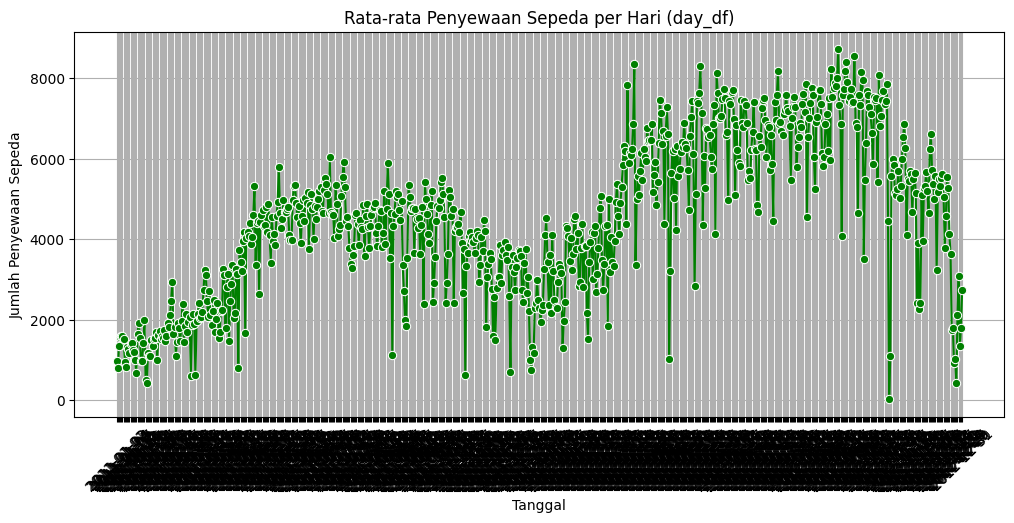

[Day_df] Musim dengan penyewaan tertinggi: 3 dengan rata-rata 5644 sepeda.
[Day_df] Musim dengan penyewaan terendah: 1 dengan rata-rata 2604 sepeda.


<ipython-input-27-85fe72ad42b2>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_avg.index, y=season_avg.values, palette="viridis")


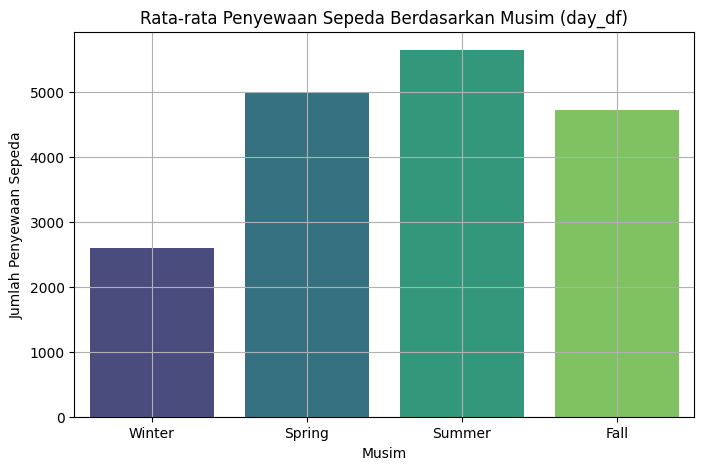

In [27]:
# Hitung rata-rata penyewaan sepeda per hari
daily_avg = day_df.groupby('dteday')['cnt'].mean()

# Menentukan hari dengan penyewaan tertinggi dan terendah
max_day = daily_avg.idxmax()
max_rentals_day = round(daily_avg.max())  # Dibulatkan ke bilangan bulat
min_day = daily_avg.idxmin()
min_rentals_day = round(daily_avg.min())  # Dibulatkan ke bilangan bulat

print(f"[Day_df] Hari dengan penyewaan tertinggi: {max_day} dengan rata-rata {max_rentals_day} sepeda.")
print(f"[Day_df] Hari dengan penyewaan terendah: {min_day} dengan rata-rata {min_rentals_day} sepeda.")

# Visualisasi penyewaan sepeda berdasarkan hari
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_avg.index, y=daily_avg.values, marker='o', color='g')
plt.title("Rata-rata Penyewaan Sepeda per Hari (day_df)")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Hitung rata-rata penyewaan berdasarkan musim (season)
season_avg = day_df.groupby('season')['cnt'].mean()

# Menentukan musim dengan penyewaan tertinggi dan terendah
max_season = season_avg.idxmax()
min_season = season_avg.idxmin()

print(f"[Day_df] Musim dengan penyewaan tertinggi: {max_season} dengan rata-rata {round(season_avg.max())} sepeda.")
print(f"[Day_df] Musim dengan penyewaan terendah: {min_season} dengan rata-rata {round(season_avg.min())} sepeda.")

# Visualisasi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=season_avg.index, y=season_avg.values, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim (day_df)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks([0, 1, 2, 3], ["Winter", "Spring", "Summer", "Fall"])
plt.grid(True)
plt.show()


**Insight:**
- Jam penyewaan sepeda paling tinggi terjadi pada pukul 17.00 di hari kerja (workingday) dengan rata-rata penyewaan sepeda sebanyak 525 sepeda, sedangkan jam penyewaan sepeda paling rendah yaitu pada pukul 13.00 di akhir pekan (weekday) dengan rata-rata penyewaan sepeda sebanyak 373 sepeda.
- Musim dengan penyewaan sepeda tertinggi terjadi pada musim 3 (Summer/panas) sebanyak 5644 sepeda, sedangkan musim dengan penyewaan sepeda terendah terjadi pada musim Winter/dingin yaitu sebanyak 2604 sepeda.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah? Apa faktor yang mempengaruhinya?
1. Penyewaan sepeda paling tinggi terjadi pada pukul 17.00 di hari kerja dengan rata-rata 525 sepeda. Hal ini kemungkinan besar disebabkan oleh jam pulang kerja, di mana banyak pekerja atau mahasiswa menggunakan sepeda sebagai sarana transportasi untuk kembali ke rumah.
2. Penyewaan sepeda paling rendah terjadi pada pukul 13.00 di akhir pekan dengan rata-rata 373 sepeda. Hal ini dapat disebabkan oleh waktu siang hari yang cenderung lebih panas, serta kebiasaan masyarakat yang lebih memilih istirahat atau melakukan aktivitas lain pada waktu tersebut.

- Conclution pertanyaan 2 : Seberapa besar pengaruh cuaca ekstrem terhadap penurunan jumlah penyewa sepeda?
1. Musim dengan jumlah penyewaan sepeda tertinggi adalah musim panas (Summer) dengan rata-rata 5.644 sepeda. Cuaca yang lebih cerah dan suhu yang lebih hangat membuat masyarakat lebih nyaman untuk bersepeda.
2. Musim dengan jumlah penyewaan sepeda terendah adalah musim dingin (Winter) dengan rata-rata 2.604 sepeda. Faktor cuaca dingin, hujan, atau salju dapat menjadi penghambat utama bagi masyarakat untuk menggunakan sepeda sebagai alat transportasi atau rekreasi.